In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction import text
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from random import *
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

In [20]:
def reducctionPCA(instances, numAtributes):
    '''Método para reducir número de atributos mediante PCA
    Parámetros:
    -instances: estrucutra de datos que contiene las instancias junto a sus atributos
    -numAtributes: el número de atributos deseado'''

    pca = PCA(n_components=numAtributes)
    pca.fit(instances)
    instances = pca.transform(instances)

    return instances

In [21]:
def tfidf(dataframe):
    '''Método utlizado para convertir un atributo en formato texto, a números
    Parámetros:
    -dataframe: estrucutra de datos que contiene las instancia junto a sus atributos
    -columnName: nombre de columna del dataframe que se desea transformar'''

    vectorizer = TfidfVectorizer()
    lemma = WordNetLemmatizer()
    sw = [lemma.lemmatize(w) for w in text.ENGLISH_STOP_WORDS]

    vectors = []
    for r in dataframe['text']:
        txt = word_tokenize(r)
        newtxt = ""
        for w in txt:
            if w not in sw:
                l = lemma.lemmatize(w)
                newtxt += l+" "

        vectors.append(newtxt)

    vectors = vectorizer.fit_transform(vectors)
    vectors= vectors.toarray()
    vectors=pd.DataFrame(vectors)

    return vectors

In [22]:
def assignLabels(data):
    data['humor']=False
    for index, row in data.iterrows():
        if index < len(data)/2:
            data['humor'].iloc[index]=False
        else:
            data['humor'].iloc[index]=True

    return data

In [23]:
def testAndTrain(data):
    from sklearn.model_selection import train_test_split
    x_train , x_test , y_train , y_test = train_test_split(data.drop(labels='humor', axis=1) , data['humor'],test_size = 0.2 , random_state = 57)
    return x_train , x_test , y_train , y_test

C:\Users\julia\AppData\Local\Temp\ipykernel_3240\2688960289.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_3240\2688960289.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True
C:\Users\julia\AppData\Local\Temp\ipykernel_3240\2688960289.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users

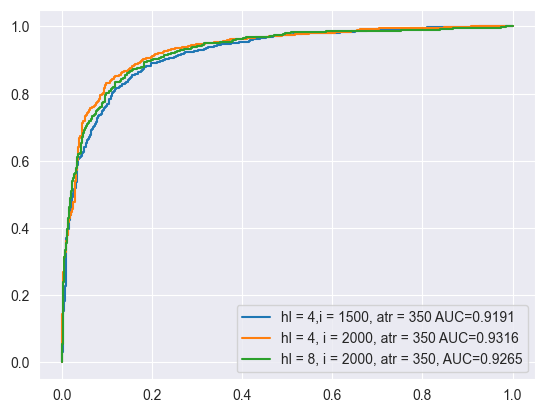

In [24]:
#Creación de la gráfica de curvas ROC
dataset = pd.read_csv('dataset.csv')
serious_text = dataset[dataset['humor'] == False].sample(5000)
humor_text = dataset[dataset['humor'] == True].sample(5000)
dataframe = pd.concat([serious_text, humor_text])


df_tfidf = tfidf(dataframe)
instances = reducctionPCA(df_tfidf, 350)
instances = pd.DataFrame(instances)
instances = assignLabels(instances)

x_train , x_test , y_train , y_test = testAndTrain(instances)


clf = MLPClassifier(solver='lbfgs',activation='relu', alpha=1, hidden_layer_sizes=(4,), random_state=1, max_iter=1500)
clf.fit(x_train, y_train)
preds = clf.predict(x_test)
y_pred = clf.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="hl = 4,i = 1500, atr = 350 AUC="+str(auc))
plt.legend()

dataset = pd.read_csv('dataset.csv')
serious_text = dataset[dataset['humor'] == False].sample(5000)
humor_text = dataset[dataset['humor'] == True].sample(5000)
dataframe = pd.concat([serious_text, humor_text])



df_tfidf = tfidf(dataframe)
instances = reducctionPCA(df_tfidf, 350)
instances = pd.DataFrame(instances)
instances = assignLabels(instances)

x_train , x_test , y_train , y_test = testAndTrain(instances)

clf = MLPClassifier(solver='lbfgs',activation='relu', alpha=1, hidden_layer_sizes=(8,), random_state=1, max_iter=2000)
clf.fit(x_train, y_train)
preds = clf.predict(x_test)
y_pred = clf.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="hl = 4, i = 2000, atr = 350 AUC="+str(auc))
plt.legend()

dataset = pd.read_csv('dataset.csv')
serious_text = dataset[dataset['humor'] == False].sample(5000)
humor_text = dataset[dataset['humor'] == True].sample(5000)
dataframe = pd.concat([serious_text, humor_text])


df_tfidf = tfidf(dataframe)
instances = reducctionPCA(df_tfidf, 350)
instances = pd.DataFrame(instances)
instances = assignLabels(instances)

x_train , x_test , y_train , y_test = testAndTrain(instances)

clf = MLPClassifier(solver='lbfgs',activation='relu', alpha=1, hidden_layer_sizes=(8,), random_state=1, max_iter=2000)
clf.fit(x_train, y_train)
preds = clf.predict(x_test)
y_pred = clf.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="hl = 8, i = 2000, atr = 350, AUC="+str(auc))
plt.legend()